In [1]:
from src.solver_results.results_dataset import VRPTableDataset
from src.solver_results.vrp_instance import VRPInstance
from src.solver_results.pca_analysis import PCAAnalyzer
from src.solver_results.classification_analysis import ClassificationAnalyzer

import pandas as pd
import numpy as np

In [6]:
def load_vrp_instances(path, instance_range):
    """Load VRP instances from CSV files."""
    instances = []

    for i in instance_range:
        filename = f"instance_{i}.csv"
        try:
            df = pd.read_csv(f"{path}/{filename}")

            instance = VRPInstance(i, df)
            instances.append(instance)
        except Exception as e:
            print(f"Error processing {filename}: {e}")

    return instances


def run_pca_analysis(X, Y, feature_cols):
    """Run PCA analysis."""
    print("\n" + "=" * 50)
    print("PCA ANALYSIS")
    print("=" * 50)

    pca_analyzer = PCAAnalyzer()
    pca_analyzer.plot_analysis(X, Y, feature_cols)

    # Find optimal components
    optimal_components, results_df = pca_analyzer.find_optimal_components(X, Y)

    return pca_analyzer


def run_classification_analysis(X, Y, feature_cols):
    """Run classification analysis."""
    print("\n" + "=" * 50)
    print("CLASSIFICATION ANALYSIS")
    print("=" * 50)

    classifier_analyzer = ClassificationAnalyzer()

    # Analyze with original features
    results_original = classifier_analyzer.run_analysis(
        X, Y, feature_cols, "Original Features"
    )

    # Analyze with PCA features
    pca_analyzer = PCAAnalyzer()
    X_pca, pca_reduced = pca_analyzer.get_pca_features(X, n_components=0.95)
    pca_feature_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

    results_pca = classifier_analyzer.run_analysis(
        X_pca, Y, pca_feature_names, f"PCA Features ({X_pca.shape[1]} components)"
    )

    return results_original, results_pca





In [10]:
path = "output/resnet_1_1_2e-07_version_cedar"

VRPInstances = load_vrp_instances(path, range(1001, 1086))

    # Define features
feature_cols = [
    "entropy_score",
    "classifier_score",
    "iter",
    "entropy_variation",
    "classifier_score_variation",
    "top_arc_value",
    "top_3_arcs",
    "top_arc_variation",
    "top_3_arcs_variation",
]

# Create dataset
dataset = VRPTableDataset(
    vrp_instances=VRPInstances,
    feature_cols=feature_cols,
    # target_col="first_time_valid",
    target_col="valid"
)

X, Y = dataset.get_sklearn_inputs()

Error processing instance_1085.csv: [Errno 2] No such file or directory: 'output/resnet_1_1_2e-07_version_cedar/instance_1085.csv'



PCA ANALYSIS


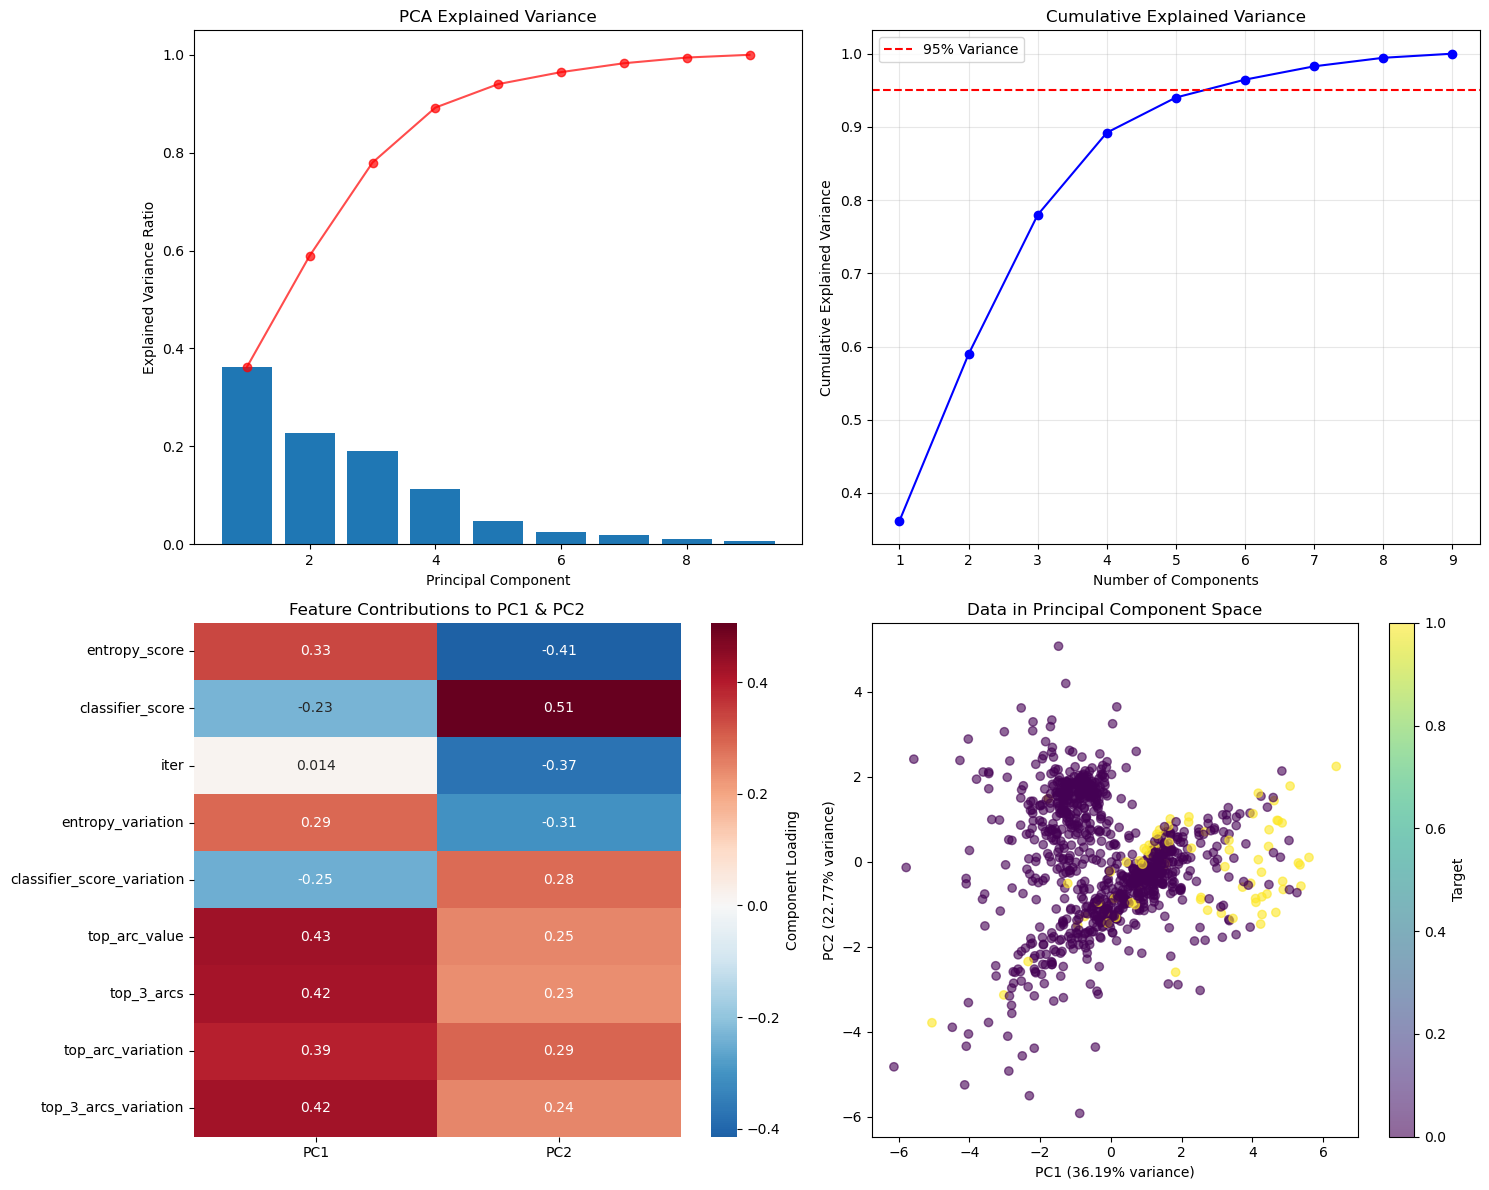


=== PCA Analysis Results ===
Total variance explained by first 2 components: 58.96%
Total variance explained by first 3 components: 77.99%

Most important features for PC1:
top_arc_value                 0.427777
top_3_arcs_variation          0.420358
top_3_arcs                    0.418071
top_arc_variation             0.394088
entropy_score                 0.334223
entropy_variation             0.287925
classifier_score_variation    0.246409
classifier_score              0.233857
iter                          0.014281
dtype: float64

Most important features for PC2:
classifier_score              0.506027
entropy_score                 0.414320
iter                          0.371229
entropy_variation             0.306253
top_arc_variation             0.291953
classifier_score_variation    0.284524
top_arc_value                 0.245353
top_3_arcs_variation          0.243958
top_3_arcs                    0.234029
dtype: float64


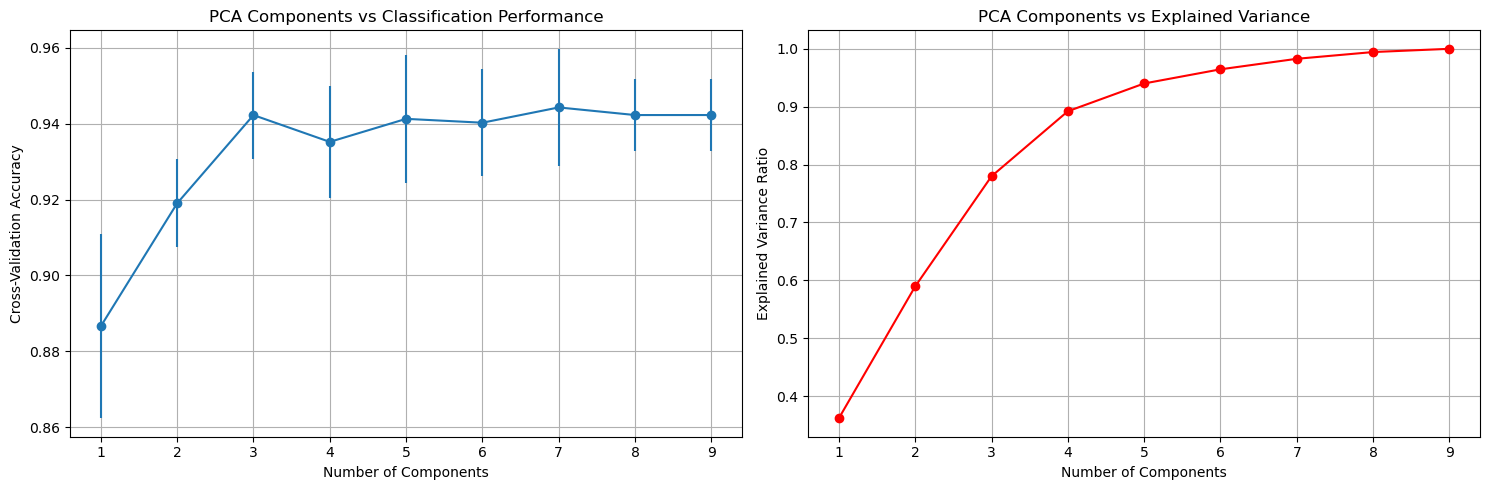

Optimal number of components: 7.0
Best accuracy: 0.944


In [11]:
run_pca_analysis(X, Y, feature_cols)


CLASSIFICATION ANALYSIS

Original Features:

Random Forest:
  Test Accuracy: 0.957
  CV Accuracy: 0.945 (+/- 0.033)
  ROC AUC: 0.909
  Confusion Matrix:
[[455   2]
 [ 19  18]]

Gradient Boosting:
  Test Accuracy: 0.941
  CV Accuracy: 0.939 (+/- 0.026)
  ROC AUC: 0.926
  Confusion Matrix:
[[446  11]
 [ 18  19]]

SVM:
  Test Accuracy: 0.702
  CV Accuracy: 0.727 (+/- 0.033)
  ROC AUC: 0.761
  Confusion Matrix:
[[323 134]
 [ 13  24]]

Logistic Regression:
  Test Accuracy: 0.826
  CV Accuracy: 0.796 (+/- 0.053)
  ROC AUC: 0.905
  Confusion Matrix:
[[374  83]
 [  3  34]]

Decision Tree:
  Test Accuracy: 0.883
  CV Accuracy: 0.856 (+/- 0.057)
  ROC AUC: 0.865
  Confusion Matrix:
[[406  51]
 [  7  30]]

Best Classifier: Random Forest

Feature Importance (Random Forest):
  entropy_score: 0.1685
  classifier_score_variation: 0.1634
  iter: 0.1398
  top_arc_variation: 0.1153
  classifier_score: 0.1048
  entropy_variation: 0.0876
  top_3_arcs_variation: 0.0820
  top_arc_value: 0.0722
  top_3_arcs

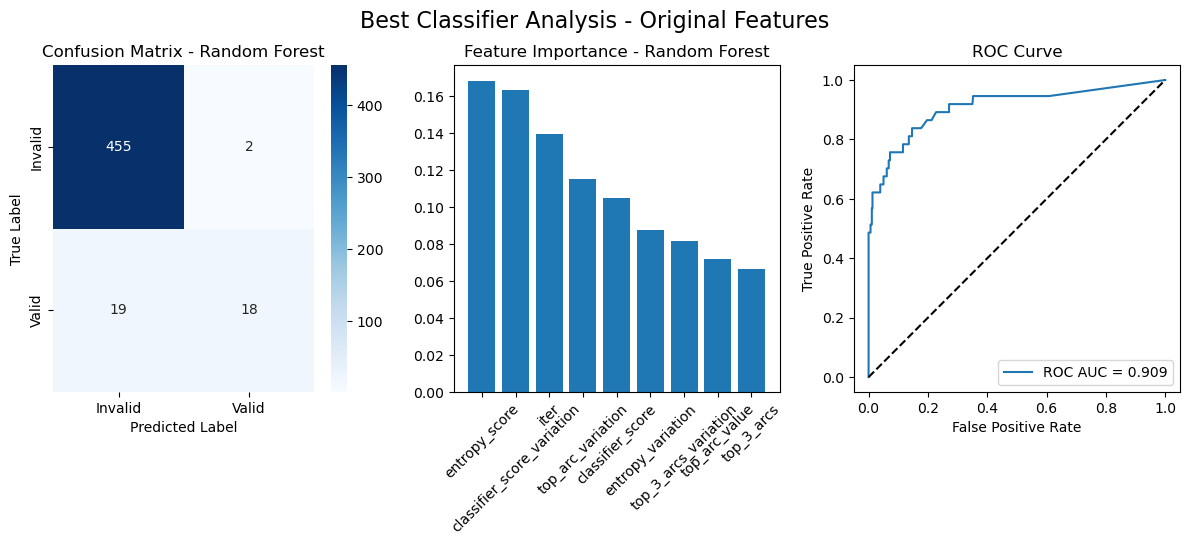

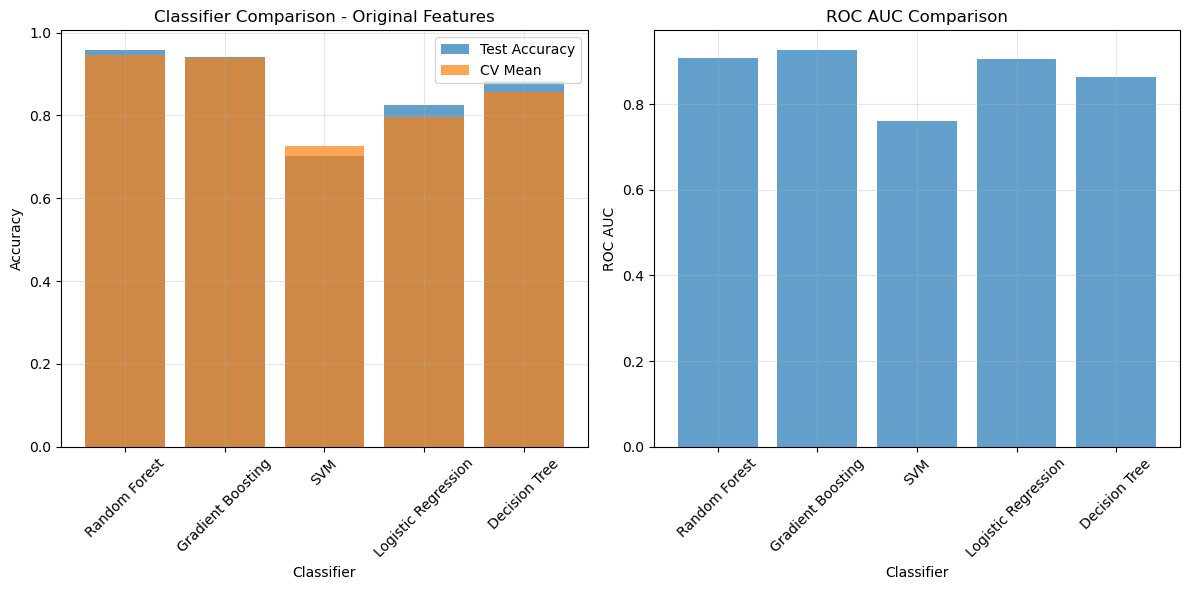


Classifier Comparison - Original Features:
         Classifier  Test Accuracy  CV Mean  CV Std  ROC AUC
      Random Forest          0.957    0.945   0.017    0.909
  Gradient Boosting          0.941    0.939   0.013    0.926
                SVM          0.702    0.727   0.017    0.761
Logistic Regression          0.826    0.796   0.026    0.905
      Decision Tree          0.883    0.856   0.028    0.865

PCA Features (6 components):

Random Forest:
  Test Accuracy: 0.945
  CV Accuracy: 0.947 (+/- 0.027)
  ROC AUC: 0.888
  Confusion Matrix:
[[454   3]
 [ 24  13]]

Gradient Boosting:
  Test Accuracy: 0.939
  CV Accuracy: 0.937 (+/- 0.023)
  ROC AUC: 0.809
  Confusion Matrix:
[[450   7]
 [ 23  14]]

SVM:
  Test Accuracy: 0.913
  CV Accuracy: 0.897 (+/- 0.024)
  ROC AUC: 0.892
  Confusion Matrix:
[[426  31]
 [ 12  25]]

Logistic Regression:
  Test Accuracy: 0.840
  CV Accuracy: 0.808 (+/- 0.094)
  ROC AUC: 0.912
  Confusion Matrix:
[[382  75]
 [  4  33]]

Decision Tree:
  Test Accuracy:

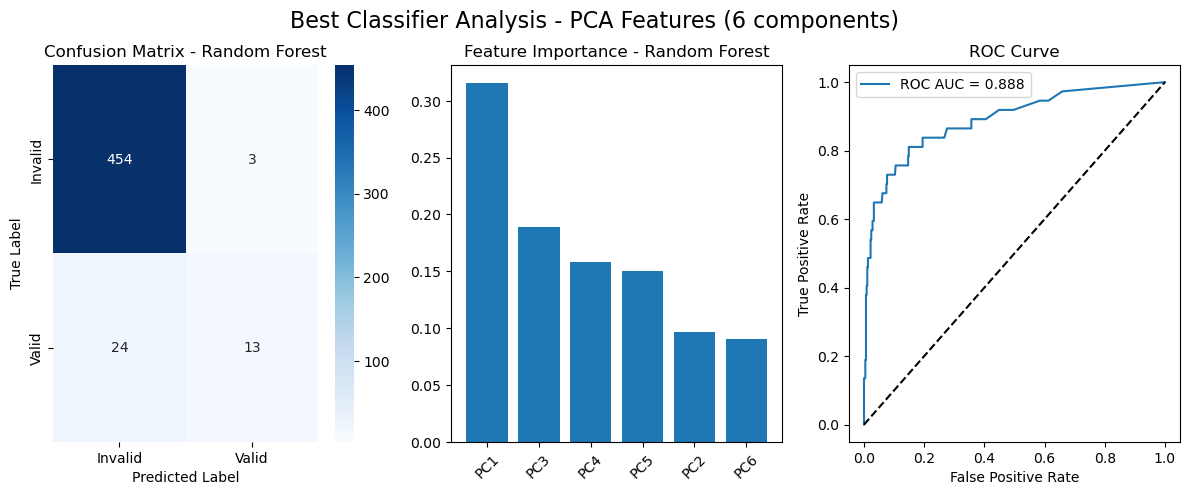

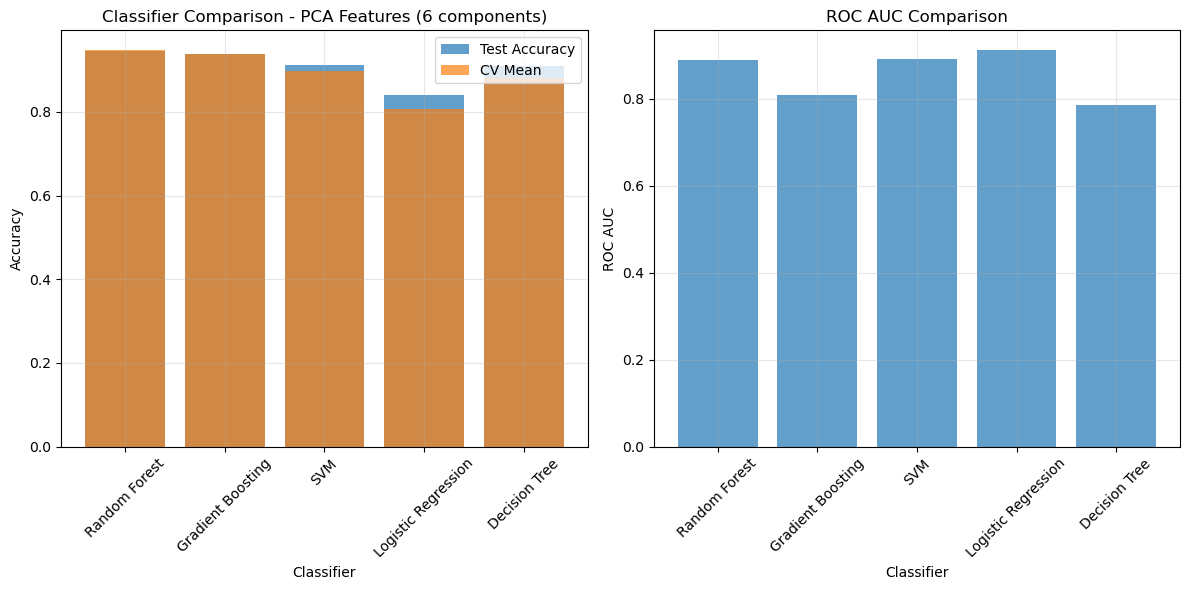


Classifier Comparison - PCA Features (6 components):
         Classifier  Test Accuracy  CV Mean  CV Std  ROC AUC
      Random Forest          0.945    0.947   0.014    0.888
  Gradient Boosting          0.939    0.937   0.012    0.809
                SVM          0.913    0.897   0.012    0.892
Logistic Regression          0.840    0.808   0.047    0.912
      Decision Tree          0.909    0.881   0.056    0.787


({'Random Forest': {'accuracy': 0.9574898785425101,
   'cv_mean': 0.9453102453102453,
   'cv_std': 0.016556201453695192,
   'confusion_matrix': array([[455,   2],
          [ 19,  18]], dtype=int64),
   'classifier': RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42),
   'roc_auc': 0.9085989709622097,
   'predictions': array([False, False, False, False, False, False, False, False, False,
          False, False, False, False, False,  True, False, False, False,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False, False,  True, False, False, False,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, Fals

In [9]:
run_classification_analysis(X, Y, feature_cols)